<a href="https://colab.research.google.com/github/MohamadRayi/MachineLearningTasks/blob/main/Task_Lecture_10_Mohamad_Rayi_Dwi_Putra_1103213070.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mohamad Rayi Dwi Putra

1103213070

Task Lecture 10 Neural Network d2l

Dataset: housepricedata.csv



**Langkah 1: Menghubungkan Google Drive ke Google Colab**

In [7]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Langkah 2: Membaca Dataset**

In [8]:
import pandas as pd

# Path ke file CSV di Google Drive
file_path = '/content/drive/MyDrive/Dataset/housepricedata.csv'

# Membaca file CSV ke dalam DataFrame Pandas
df = pd.read_csv(file_path)

# Menampilkan beberapa baris pertama dari DataFrame
print(df.head())


   LotArea  OverallQual  OverallCond  TotalBsmtSF  FullBath  HalfBath  \
0     8450            7            5          856         2         1   
1     9600            6            8         1262         2         0   
2    11250            7            5          920         2         1   
3     9550            7            5          756         1         0   
4    14260            8            5         1145         2         1   

   BedroomAbvGr  TotRmsAbvGrd  Fireplaces  GarageArea  AboveMedianPrice  
0             3             8           0         548                 1  
1             3             6           1         460                 1  
2             3             6           1         608                 1  
3             3             7           1         642                 0  
4             4             9           1         836                 1  


**Langkah 3: Persiapan Data**

In [9]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Memisahkan fitur (X) dan label (y)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Normalisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


**Langkah 4: Membuat Dataset dan DataLoader**

In [10]:
import torch
from torch.utils.data import DataLoader, TensorDataset

# Mengubah data menjadi tensornya
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Membuat Dataset dan DataLoader
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


**Langkah 5: Membangun dan Melatih Model Neural Network dengan Visualisasi**

Epoch [10/100], Loss: 0.0602
Epoch [20/100], Loss: 0.0474
Epoch [30/100], Loss: 0.0425
Epoch [40/100], Loss: 0.0328
Epoch [50/100], Loss: 0.0262
Epoch [60/100], Loss: 0.0241
Epoch [70/100], Loss: 0.0208
Epoch [80/100], Loss: 0.0194
Epoch [90/100], Loss: 0.0164
Epoch [100/100], Loss: 0.0162


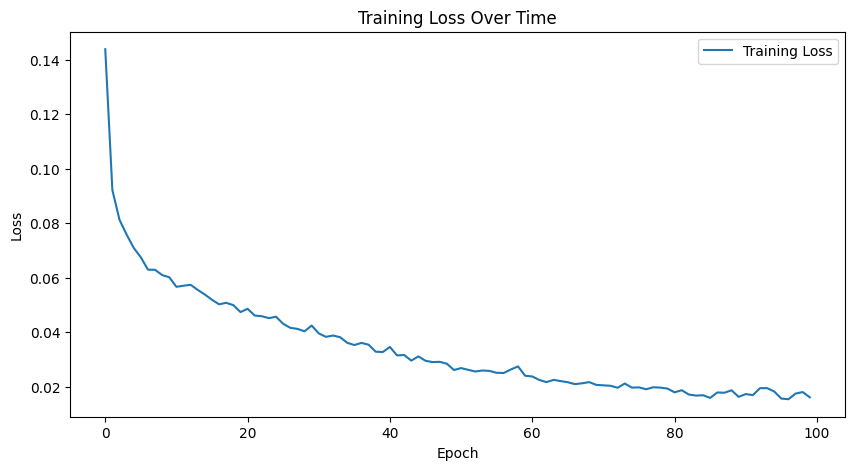

In [11]:
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Mendefinisikan arsitektur neural network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Menginisialisasi model, loss function, dan optimizer
model = Net()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Melatih model
num_epochs = 100
train_losses = []

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    train_losses.append(epoch_loss / len(train_loader))

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss / len(train_loader):.4f}')

# Visualisasi Loss Selama Pelatihan
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Time')
plt.legend()
plt.show()


**Langkah 6: Evaluasi Model dengan Visualisasi**

Test Loss: 0.1074


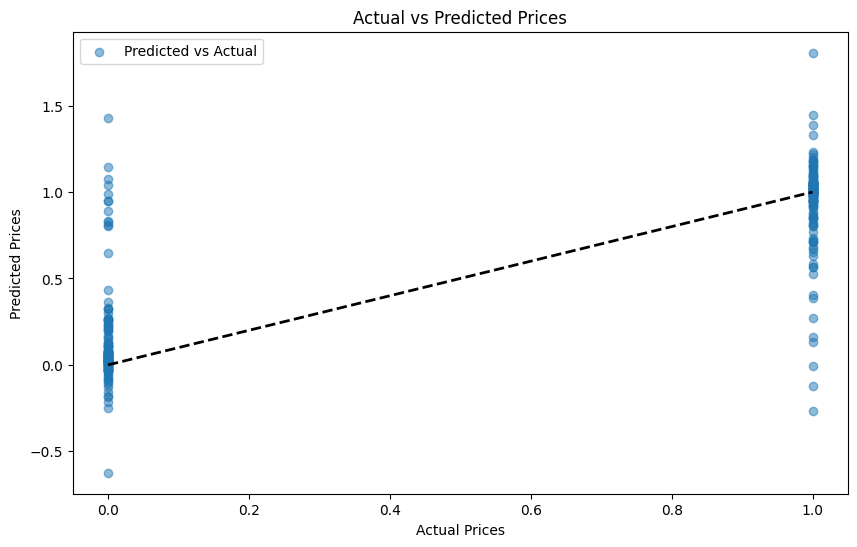

In [12]:
model.eval()
test_losses = []

with torch.no_grad():
    y_pred_list = []
    for X_batch, y_batch in test_loader:
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        test_losses.append(loss.item())
        y_pred_list.append(y_pred)

    test_loss = np.mean(test_losses)
    print(f'Test Loss: {test_loss:.4f}')

# Visualisasi Prediksi vs Nilai Aktual
y_pred_np = torch.cat(y_pred_list).numpy()
y_test_np = y_test.numpy()

plt.figure(figsize=(10, 6))
plt.scatter(y_test_np, y_pred_np, alpha=0.5, label='Predicted vs Actual')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.plot([y_test_np.min(), y_test_np.max()], [y_test_np.min(), y_test_np.max()], 'k--', lw=2)
plt.legend()
plt.show()
